In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.option_context('mode.use_inf_as_na', True)


In [69]:
# Load the dataset
df = pd.read_csv('price_paid_records.csv',chunksize=10000)

# Display the first few rows of the dataset


In [70]:
count=0;
final_df = pd.DataFrame()
for chunki in df:
    result = chunki.sample(frac=0.0005)
    lenresult = len(result)
    count= count+ lenresult
    final_df = pd.concat([final_df,result],ignore_index=True)
print(count)

11245


In [54]:
len(final_df)

11245

In [71]:
df= final_df

In [72]:
print(df.info())  # Check for missing values and data types
print(df.describe())  # Get basic statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11245 entries, 0 to 11244
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Transaction unique identifier      11245 non-null  object
 1   Price                              11245 non-null  int64 
 2   Date of Transfer                   11245 non-null  object
 3   Property Type                      11245 non-null  object
 4   Old/New                            11245 non-null  object
 5   Duration                           11245 non-null  object
 6   Town/City                          11245 non-null  object
 7   District                           11245 non-null  object
 8   County                             11245 non-null  object
 9   PPDCategory Type                   11245 non-null  object
 10  Record Status - monthly file only  11245 non-null  object
dtypes: int64(1), object(10)
memory usage: 966.5+ KB
None
              

C:\softwares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


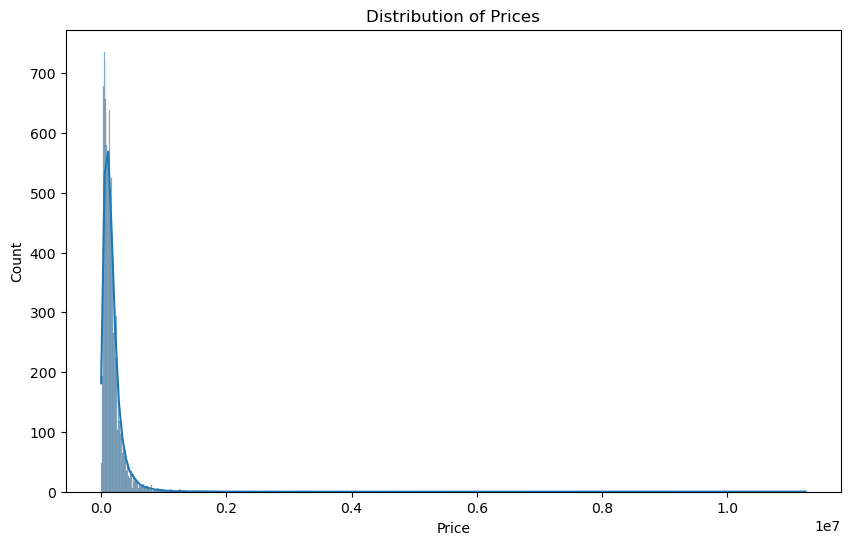

C:\softwares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


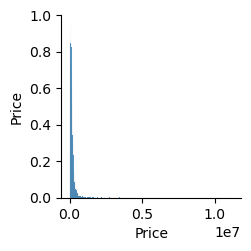

In [73]:
# Visualize the distribution of price (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

# Pairplot for a deeper look at relationships (only for numeric columns)
sns.pairplot(df)
plt.show()

In [74]:
# Handle missing values (fill with median for numerical features)
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df['Year'] = df['Date of Transfer'].dt.year
df['Month'] = df['Date of Transfer'].dt.month
df['Day'] = df['Date of Transfer'].dt.day
# Define the numerical columns (these are the ones we want to scale)
numerical_cols = ['Year', 'Month', 'Day']  
# Drop 'Transaction unique identifier' as it's not useful for prediction
df = df.drop('Transaction unique identifier', axis=1)
# Example: One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Property Type', 'Old/New', 'Town/City', 'District', 'Duration','County', 'PPDCategory Type'], drop_first=True)

# Scale numeric columns (if necessary)

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [75]:
# Features (X) and target (y)

X = df.drop('Price', axis=1)  # Drop the target variable from the feature set
y = df['Price']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
df.head(30)

,Price,Date of Transfer,Record Status - monthly file only,Year,Month,Day,Property Type_F,Property Type_O,Property Type_S,Property Type_T,...,County_WEST SUSSEX,County_WEST YORKSHIRE,County_WILTSHIRE,County_WINDSOR AND MAIDENHEAD,County_WOKINGHAM,County_WORCESTERSHIRE,County_WREKIN,County_WREXHAM,County_YORK,PPDCategory Type_B
0,60000,1995-04-13,A,-1.607597,-0.830513,-0.451375,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,63500,1995-02-10,A,-1.607597,-1.425134,-0.782637,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,160000,1995-07-21,A,-1.607597,0.061419,0.431991,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15000,1995-06-29,A,-1.607597,-0.235892,1.315357,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,51000,1995-07-03,A,-1.607597,0.061419,-1.555582,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
5,55750,1995-05-19,A,-1.607597,-0.533203,0.211150,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,25500,1995-02-28,A,-1.607597,-1.425134,1.204936,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,30000,1995-12-12,A,-1.607597,1.547972,-0.561796,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,36500,1995-12-01,A,-1.607597,1.547972,-1.776424,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9,330000,1995-03-10,A,-1.607597,-1.127824,-0.782637,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

TypeError: Cannot cast DatetimeArray to dtype float32

print(data_encoded)


# 